### PART A: ARCH_GARCH Model

In [1]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [2]:

import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [3]:
# Get the data for Tata Motors
ticker = "BAJAJ-AUTO.NS"

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1317.03
Distribution:                  Normal   AIC:                           2640.06
Method:            Maximum Likelihood   BIC:                           2653.87
                                        No. Observations:                  739
Date:                Thu, Jul 25 2024   Df Residuals:                      738
Time:                        21:57:45   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1450  5.310e-02      2.730  6.327e-03 [4.090e-0

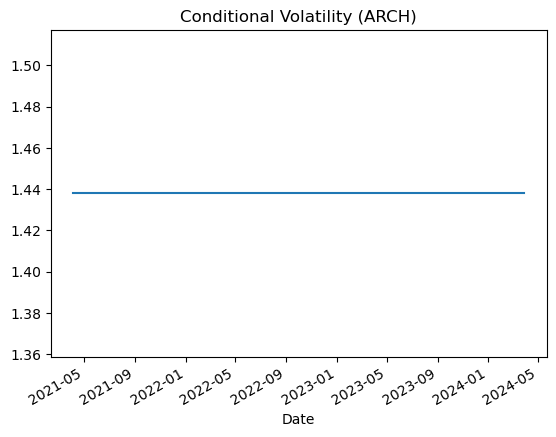

In [4]:
# Create 'Returns' column
data['Returns'] = 100 * data['Adj Close'].pct_change().dropna()

# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'].dropna(), vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1313.94
Distribution:                  Normal   AIC:                           2635.88
Method:            Maximum Likelihood   BIC:                           2654.30
                                        No. Observations:                  739
Date:                Thu, Jul 25 2024   Df Residuals:                      738
Time:                        21:57:52   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1375  5.435e-02      2.531  1.139e-02 [3.101e-0

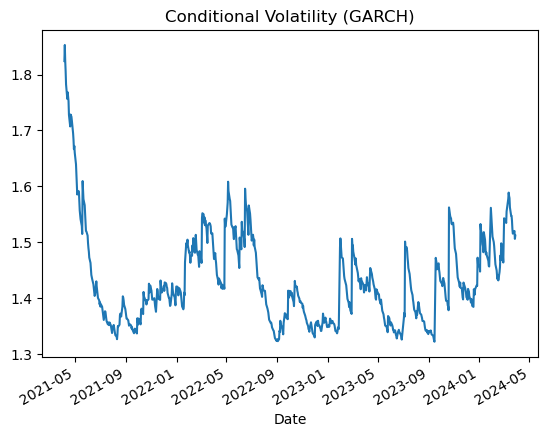

In [5]:
# Drop NaN values from 'Returns'
returns = data['Returns'].dropna()

# Fit a GARCH model
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [6]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=10)

Iteration:     10,   Func. Count:     67,   Neg. LLF: 1330.9411319067258
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1313.9381034685132
            Iterations: 16
            Function evaluations: 98
            Gradient evaluations: 16


In [7]:
forecasts = res.forecast()

In [8]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-21,8608.200195,8770.000000,8585.000000,8750.599609,8680.054688,720691,1.331701
2024-03-22,8700.049805,9050.000000,8682.000000,8945.250000,8873.135742,851210,2.224422
2024-03-26,8945.250000,9020.000000,8851.049805,8960.549805,8888.311523,534067,0.171031
2024-03-27,8959.000000,9287.799805,8926.700195,9162.500000,9088.633789,1034030,2.253772
2024-03-28,9162.500000,9243.599609,8980.049805,9148.150391,9074.400391,847202,-0.156607


In [10]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.137536
                 h.1
Date                
2024-03-28  2.246649
                 h.1
Date                
2024-03-28  2.246649


In [11]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  2.246649  2.236731  2.227253  2.218195  2.209538  2.201265   

                h.07      h.08      h.09     h.10  ...      h.81      h.82  \
Date                                               ...                       
2024-03-28  2.193358  2.185802  2.178581  2.17168  ...  2.028818  2.028554   

                h.83     h.84     h.85     h.86      h.87      h.88      h.89  \
Date                                                                            
2024-03-28  2.028301  2.02806  2.02783  2.02761  2.027399  2.027198  2.027006   

                h.90  
Date                  
2024-03-28  2.026822  

[1 rows x 90 columns]


In [12]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,2.246649,2.236731,2.227253,2.218195,2.209538,2.201265,2.193358,2.185802,2.178581,2.17168,...,2.028818,2.028554,2.028301,2.02806,2.02783,2.02761,2.027399,2.027198,2.027006,2.026822


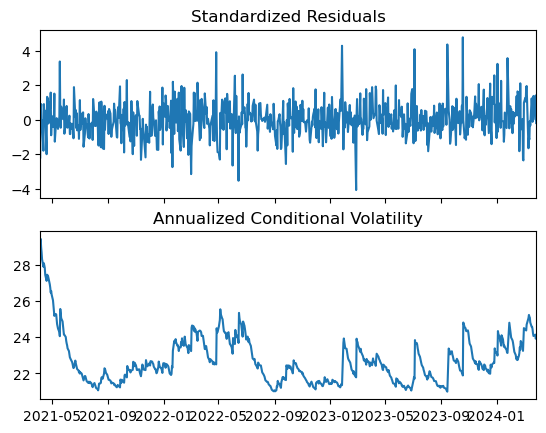

In [13]:
fig = res.plot(annualize="D")
